In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.decomposition import PCA

In [2]:
!pip install cvxopt

In [3]:
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Splitting data set

In [6]:
X = df.drop(["MEDV"], axis=1)
Y = df["MEDV"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=777)

In [7]:
x_num = x_train.drop(["CHAS"], axis=1)
num_col = x_num.columns
num_col

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

### Feature Scaling

In [8]:
scaler = StandardScaler()
# x_train[num_col] = x_train.drop(["CHAS"], axis=1)
x_train[num_col] = scaler.fit_transform(x_train[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])

In [9]:
tr_dummies = pd.get_dummies(x_train["CHAS"], prefix="CHAS")
ts_dummies = pd.get_dummies(x_test["CHAS"], prefix="CHASE")

In [10]:
x_train = x_train.drop(["CHAS"], axis=1)
x_test = x_test.drop(["CHAS"], axis=1)

In [11]:
x_train = pd.concat([x_train, tr_dummies], axis=1)
x_test = pd.concat([x_test, ts_dummies], axis=1)

### Lasso cross validation

In [12]:
lasso_model = LassoCV(cv=10, random_state=777, max_iter=10000)
lasso_model.fit(x_train, y_train)
lasso_model.alpha_

0.011089082961135479

In [13]:
lasso_best = Lasso(alpha=lasso_model.alpha_)
lasso_best.fit(x_train, y_train)

Lasso(alpha=0.011089082961135479)

In [14]:
pprint(list(zip(lasso_best.coef_, df)))

[(-0.7632918583807559, 'CRIM'),
 (1.4210582252371402, 'ZN'),
 (0.06806018124397856, 'INDUS'),
 (-1.74823976110032, 'CHAS'),
 (2.1683441123852703, 'NOX'),
 (-0.6646626884534463, 'RM'),
 (-2.813232745076073, 'AGE'),
 (2.198410869807082, 'DIS'),
 (-2.0837370901082823, 'RAD'),
 (-1.4839819494658661, 'TAX'),
 (0.7955840281393455, 'PTRATIO'),
 (-3.0950170348223827, 'B'),
 (-3.285734058090429, 'LSTAT'),
 (8.539922789180402e-15, 'MEDV')]


### Ridge cross validation

In [15]:
alpha_range = np.linspace(0.01,500,100)
ridge_model = RidgeCV(alphas=alpha_range, store_cv_values=True, scoring=None)
ridge_model.fit(x_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 5.06040404e+00, 1.01108081e+01, 1.51612121e+01,
       2.02116162e+01, 2.52620202e+01, 3.03124242e+01, 3.53628283e+01,
       4.04132323e+01, 4.54636364e+01, 5.05140404e+01, 5.55644444e+01,
       6.06148485e+01, 6.56652525e+01, 7.07156566e+01, 7.57660606e+01,
       8.08164646e+01, 8.58668687e+01, 9.09172727e+01, 9.59676768e+01,
       1.01018081e+02, 1.06068485e+0...
       3.83840707e+02, 3.88891111e+02, 3.93941515e+02, 3.98991919e+02,
       4.04042323e+02, 4.09092727e+02, 4.14143131e+02, 4.19193535e+02,
       4.24243939e+02, 4.29294343e+02, 4.34344747e+02, 4.39395152e+02,
       4.44445556e+02, 4.49495960e+02, 4.54546364e+02, 4.59596768e+02,
       4.64647172e+02, 4.69697576e+02, 4.74747980e+02, 4.79798384e+02,
       4.84848788e+02, 4.89899192e+02, 4.94949596e+02, 5.00000000e+02]),
        store_cv_values=True)

In [16]:
ridge_model.alpha_

5.06040404040404

In [17]:
ridge_best = Ridge(alpha=ridge_model.alpha_)
ridge_best.fit(x_train, y_train)

Ridge(alpha=5.06040404040404)

In [18]:
pprint(list(zip(ridge_best.coef_, df)))

[(-0.7438746059484319, 'CRIM'),
 (1.3515361602056146, 'ZN'),
 (0.017795435557295555, 'INDUS'),
 (-1.6369567812058434, 'CHAS'),
 (2.2090120683788457, 'NOX'),
 (-0.6873571280749277, 'RM'),
 (-2.6633913871943315, 'AGE'),
 (1.9650094571493235, 'DIS'),
 (-1.8635964455630922, 'RAD'),
 (-1.481637223270767, 'TAX'),
 (0.808834463250526, 'PTRATIO'),
 (-3.01652840620812, 'B'),
 (-1.5724197509738789, 'LSTAT'),
 (1.5724197509738709, 'MEDV')]


### Comparing Lasso and Ridge

In [19]:
y_pred = ridge_best.predict(x_test)
print ("Ridge mean_squared_error : ", mean_squared_error(y_test, y_pred))

y_pred = lasso_best.predict(x_test)
print ("Lasso mean_squared_error : ", mean_squared_error(y_test, y_pred))

Ridge mean_squared_error :  32.37762705631108
Lasso mean_squared_error :  32.04622105590019


### Linear Regression using only categorical variable

In [20]:
x = df["CHAS"]
y = df["MEDV"]
x = sm.add_constant(x)
x_train_, x_test_, y_train_, y_test_ = train_test_split(x, y, test_size=0.2, random_state=777)

In [21]:
# from statsmodels.regression.linear_model import OLS


data_train = pd.concat([x_train_, y_train_], axis=1)

model_reg = sm.OLS(y_train_, x_train_["CHAS"])
model_fit_lasso = model_reg.fit_regularized(method="sqrt_lasso", L1_wt=1)
# model_fit_lasso.summary()

In [22]:
# res = model_fit_.resid
# fig = sm.qqplot(res, line='s')
# plt.show()

In [23]:
y_test_pred = model_fit_lasso.predict(x_test_["CHAS"])
sq = (y_test_pred-y_test_)**2 
lasso_model_err = sq.mean()
lasso_model_err

709.0517555352278

In [24]:
model_fit_ridge = model_reg.fit_regularized(method="sqrt_lasso", L1_wt=0)

y_test_pred = model_fit_ridge.predict(x_test_["CHAS"])
sq = (y_test_pred-y_test_)**2 
ridge_model_err = sq.mean()
ridge_model_err

709.0517555352278

# Part 2

### PCA

In [25]:
pca = PCA()
pca_fit = pca.fit(x_train[num_col])
print("Explained Variance: %s" % pca_fit.explained_variance_ratio_)
cum_sum_eigenvalues = np.cumsum(pca_fit.explained_variance_ratio_)
print("Cumulative Explained Variance: %s" % cum_sum_eigenvalues)

Explained Variance: [0.5179391  0.11401607 0.09246064 0.06463751 0.05415146 0.04587399
 0.03304881 0.02437989 0.01781031 0.01607095 0.01383765 0.00577361]
Cumulative Explained Variance: [0.5179391  0.63195518 0.72441581 0.78905332 0.84320478 0.88907878
 0.92212759 0.94650747 0.96431779 0.98038873 0.99422639 1.        ]


In [26]:
out_feats = pca_fit.transform(x_train[num_col])

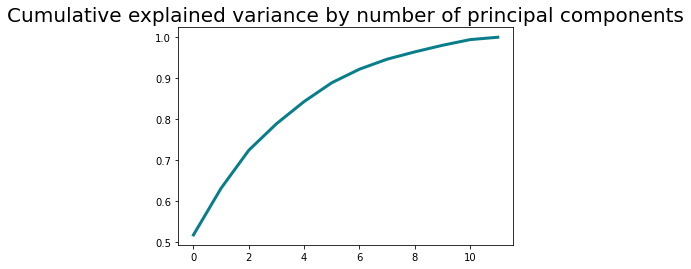

In [27]:
plt.plot(pca_fit.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [28]:
pca_fit.n_components_

12

Best number of features selected is 12

### Feature Importance using trees and forest

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [30]:
y_pred = dt_regressor.predict(x_test)

(0, 'CRIM', 0.0378413411435971)
(1, 'ZN', 0.0013385180785423073)
(2, 'INDUS', 0.010526799001100954)
(3, 'NOX', 0.011483144176596469)
(4, 'RM', 0.49999155551724717)
(5, 'AGE', 0.016909433063036414)
(6, 'DIS', 0.0446349282305829)
(7, 'RAD', 0.0031938965852601874)
(8, 'TAX', 0.0025680729092943636)
(9, 'PTRATIO', 0.02260226332626037)
(10, 'B', 0.020058276449136415)
(11, 'LSTAT', 0.3270072993892283)
(12, 'CHAS_0.0', 2.741261647502697e-05)
(13, 'CHAS_1.0', 0.001817059513642093)


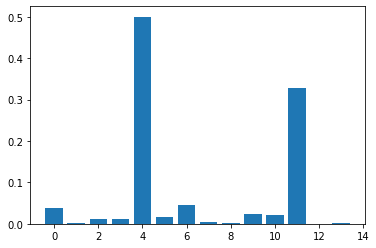

In [31]:
importance = dt_regressor.feature_importances_
for i,v in enumerate(importance):
    print( (i,x_train.columns[i],v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [32]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.2569620253164557
Mean Squared Error: 20.96569620253165
Root Mean Squared Error: 4.578831314050743


In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=0)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

(0, 'CRIM', 0.04349740476328862)
(1, 'ZN', 0.0009103405058610075)
(2, 'INDUS', 0.009725625253353644)
(3, 'NOX', 0.011392826792310205)
(4, 'RM', 0.43005394210779624)
(5, 'AGE', 0.01641935302355077)
(6, 'DIS', 0.04481899580541774)
(7, 'RAD', 0.0024888680699278283)
(8, 'TAX', 0.010693986782290598)
(9, 'PTRATIO', 0.010900498585184503)
(10, 'B', 0.014603306351198823)
(11, 'LSTAT', 0.40291389506934633)
(12, 'CHAS_0.0', 0.0004941813666913487)
(13, 'CHAS_1.0', 0.0010867755237825368)


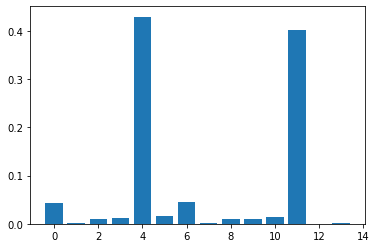

In [35]:
importance = rf_regressor.feature_importances_
for i,v in enumerate(importance):
    print( (i,x_train.columns[i],v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.5567721518987336
Mean Squared Error: 14.92246044303797
Root Mean Squared Error: 3.8629600623146456


### Variance Inflation Factor

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns

In [38]:
vif

,VIF Factor,features
0,1.759289,CRIM
1,2.292413,ZN
2,4.120139,INDUS
3,4.640737,NOX
4,1.978386,RM
5,3.017392,AGE
6,3.857727,DIS
7,6.747978,RAD
8,8.437529,TAX
9,1.742165,PTRATIO
